In [419]:
import pandas as pd

# EDA

In [420]:
df1 = pd.read_excel("Copper_Set.xlsx")
df = df1.copy()
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [421]:
df.shape

(181673, 14)

In [422]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [423]:
df.drop("id", axis=1, inplace=True)

In [424]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [425]:
df.isnull().sum()

item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [426]:
# deleting material_ref column because not usefull for ML as well as 77919 null values
df.drop("material_ref", axis=1, inplace=True)
#  deleting all the row which altleast have one null values
df = df.dropna()

In [427]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [428]:
df.dtypes

item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [429]:
# changing into respective data types
df.loc[:, "item_date"] = pd.to_datetime(df["item_date"], format='%Y%m%d', errors='coerce')

In [430]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

C:\Users\usrva\AppData\Local\Temp\ipykernel_788\3421087245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')


In [431]:
df.loc[:, "delivery date"] = pd.to_datetime(df["delivery date"], format='%y%m%d', errors='coerce')

In [432]:
df.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [433]:
df.isnull().sum()

item_date             2
quantity tons         1
customer              0
country               0
status                0
item type             0
application           0
thickness             0
width                 0
product_ref           0
delivery date    181638
selling_price         0
dtype: int64

In [434]:
df.drop("delivery date", axis=1, inplace=True)
df = df.dropna()

C:\Users\usrva\AppData\Local\Temp\ipykernel_788\2939141476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("delivery date", axis=1, inplace=True)


In [435]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [436]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00


In [437]:
df.shape

(181635, 11)

In [438]:
df.nunique()

item_date           250
quantity tons    181635
customer           1167
country              17
status                9
item type             7
application          30
thickness           594
width              1386
product_ref          33
selling_price      9795
dtype: int64

In [439]:
df["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [440]:
df["item type"].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [441]:
df_p=df.copy()

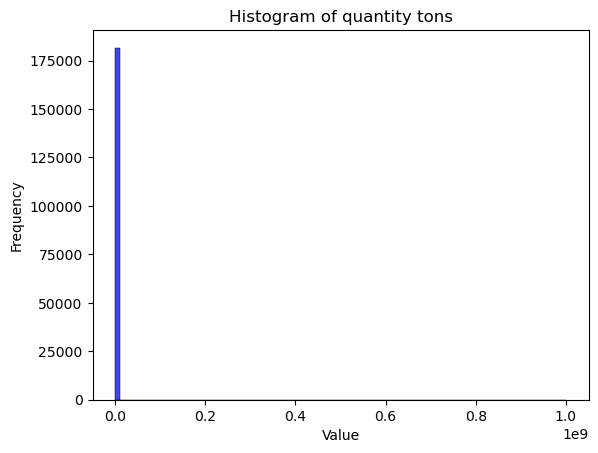

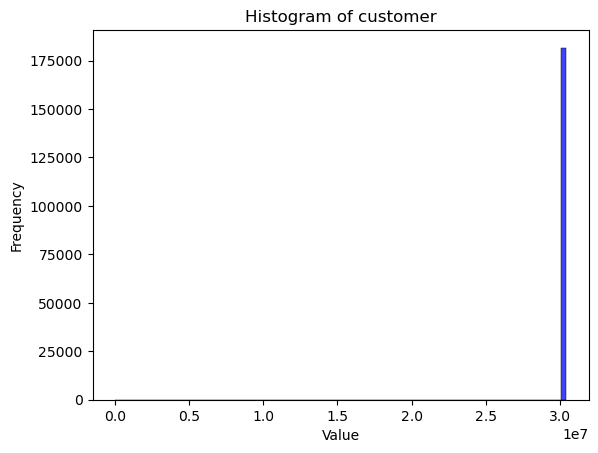

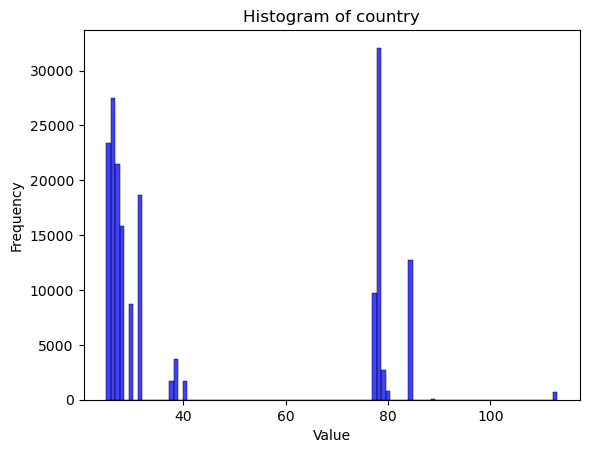

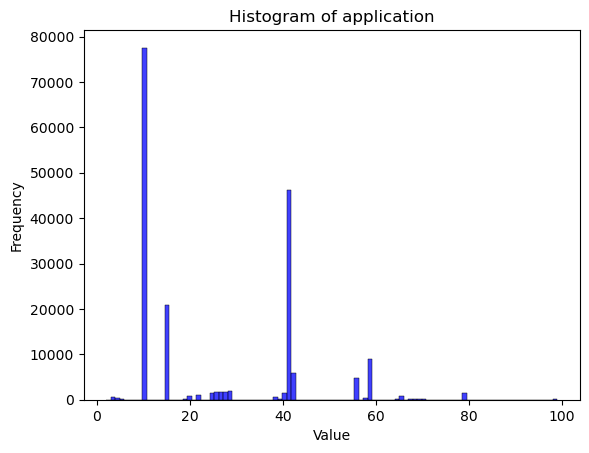

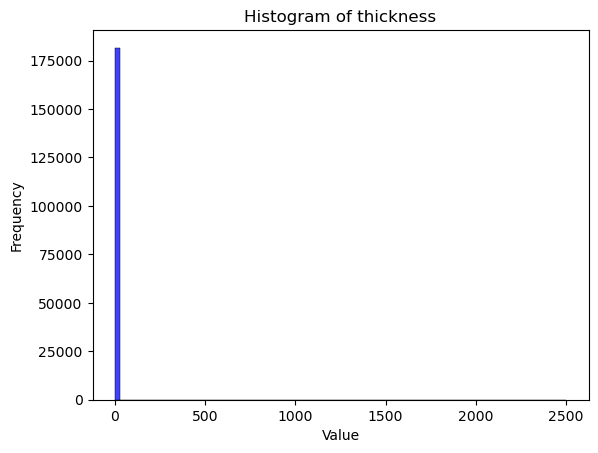

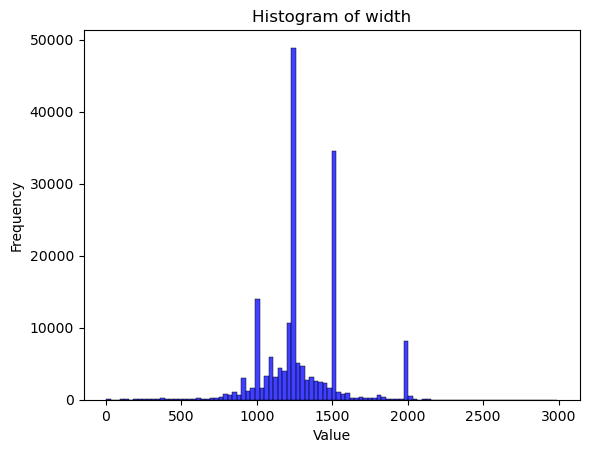

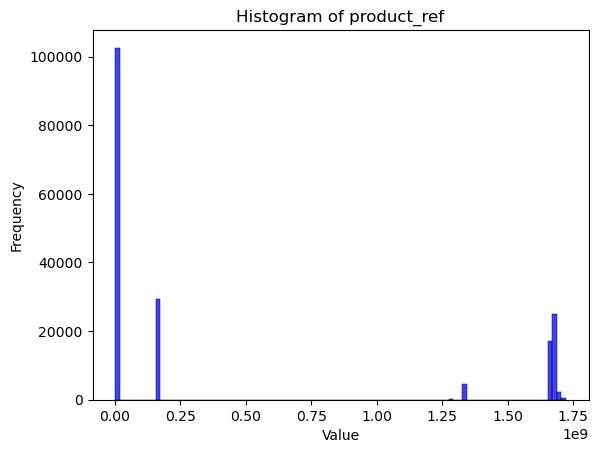

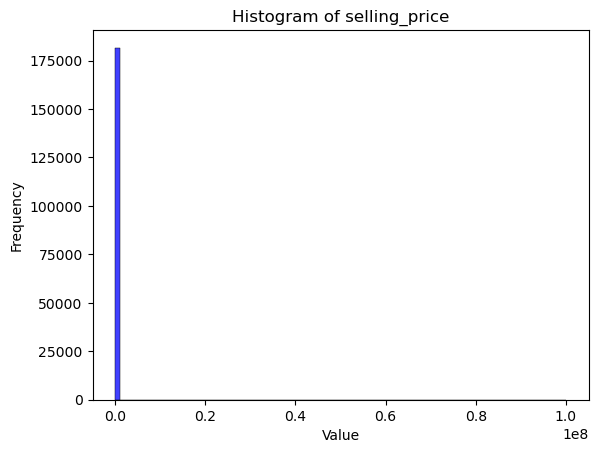

In [442]:
# Checking for skewness using histogram
import seaborn as sns
import matplotlib.pyplot as plt


for column in df_p.select_dtypes(include='number').columns:
    sns.histplot(data=df_p, x=column, bins=100, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    
# 'quantity tons' skewed
# 'thickness' skewed           
# 'selling_price'skewed

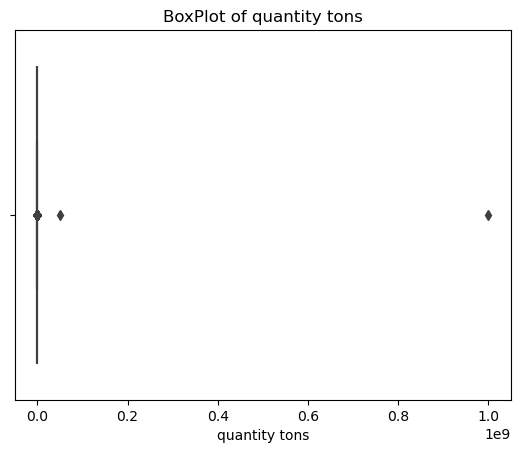

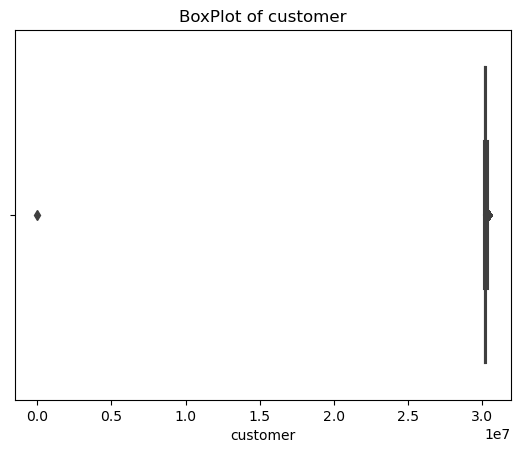

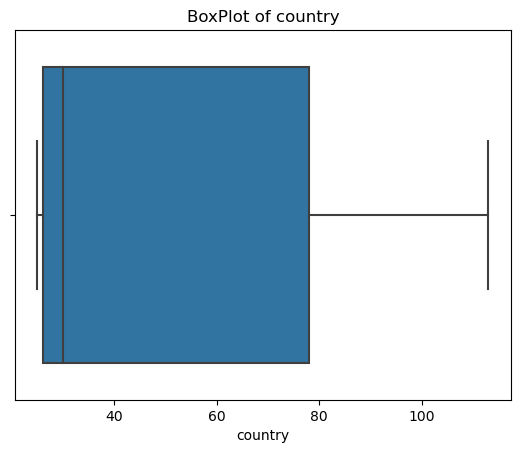

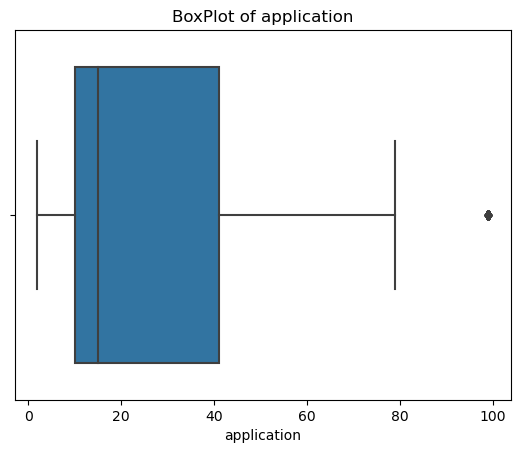

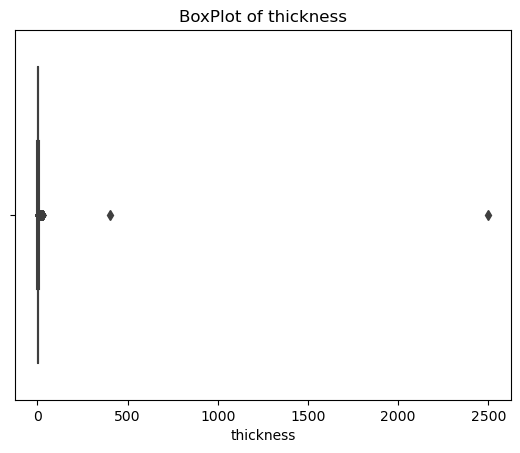

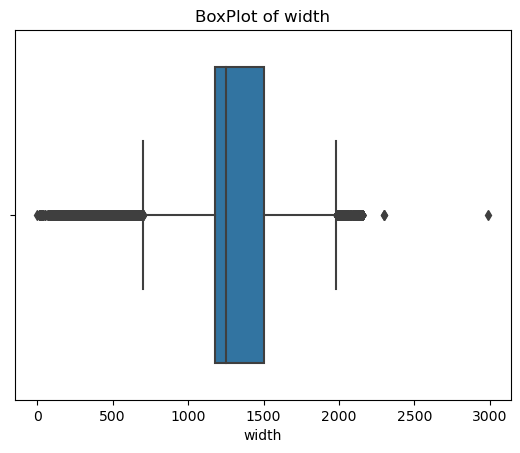

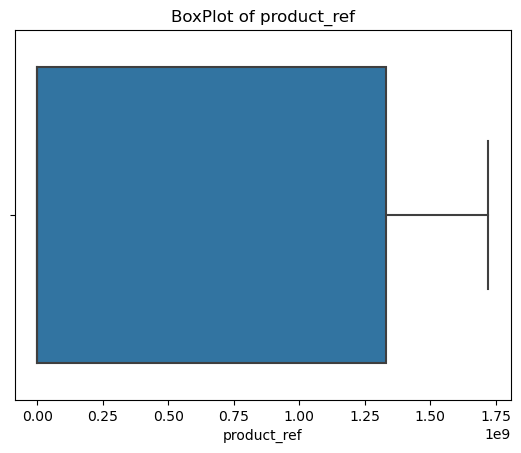

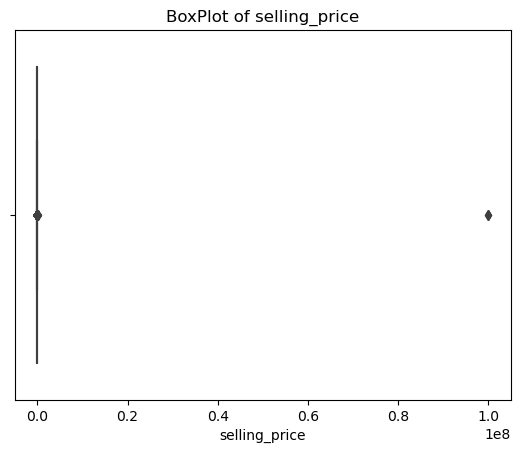

In [443]:
# checking for outliers
for column in df_p.select_dtypes(include='number').columns:
    sns.boxplot(x=df_p[column])
    plt.title(f'BoxPlot of {column}')
    plt.show()


In [444]:
# removing value less that zero because which are impossible for this columns
import numpy as np
mask1 = df_p['selling_price'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'selling_price'] = np.nan

mask1 = df_p['quantity tons'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'quantity tons'] = np.nan

mask1 = df_p['thickness'] <= 0
print(mask1.sum())

7
4
0


In [445]:
df_p.isnull().sum()

item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    7
dtype: int64

In [446]:
df_p.dropna(inplace=True)
df_p.shape

(181624, 11)

In [447]:
# removed outliers and checking skewness
Q1 = np.percentile(df_p["quantity tons"], 25)
Q3 = np.percentile(df_p["quantity tons"], 75)

IQR = Q3-Q1
lower_limit = Q1-(IQR*1.5)
uppper_limit = Q3+(IQR*1.5)

Non_outliers = [x for x in df_p["quantity tons"] if x >= lower_limit and x <= uppper_limit]
print(max(Non_outliers))



151.45006433356377


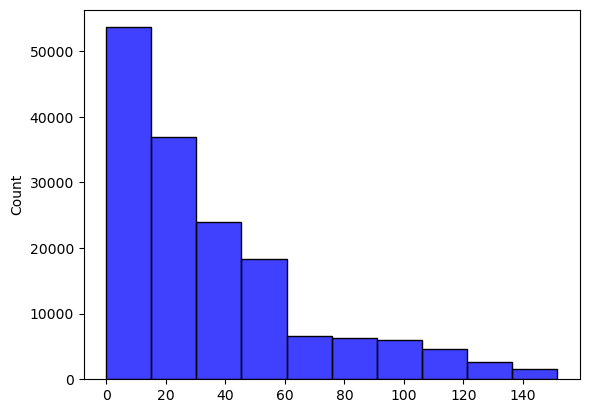

In [448]:
sns.histplot(x=Non_outliers, bins=10, color='blue')
plt.show()

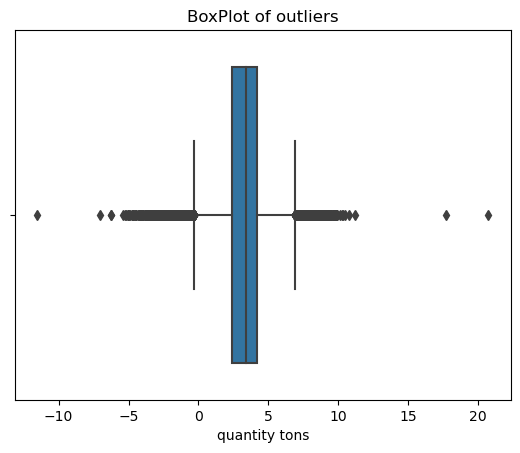

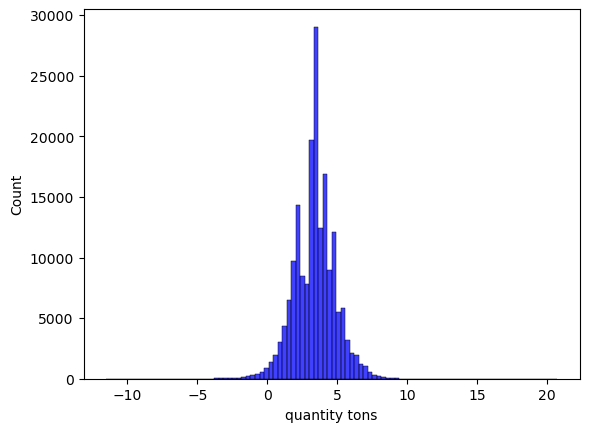

In [449]:
# checking log transformation in "quantity tons"
log_data = np.log(df_p["quantity tons"])

sns.boxplot(x=log_data)
plt.title(f'BoxPlot of outliers')
plt.show()

sns.histplot(x=log_data, bins=100, color='blue')
plt.show()

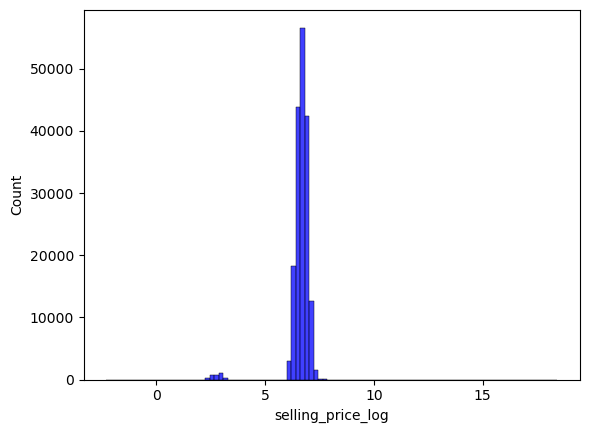

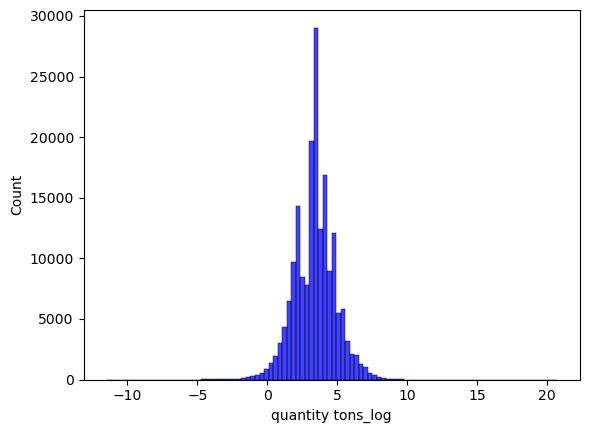

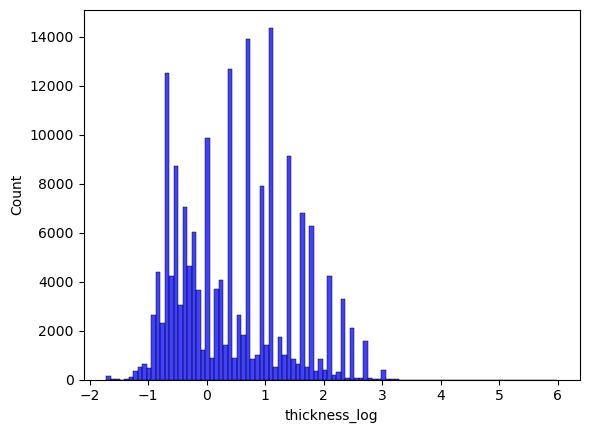

In [450]:
# creating new columns using log transformation to change skewed data into normal Distribution which increaces performance of algorithm
import numpy as np
df_p['selling_price_log'] = np.log(df_p['selling_price'])
sns.histplot(df_p['selling_price_log'],  bins=100, color='blue')
plt.show()

df_p['quantity tons_log'] = np.log(df_p['quantity tons'])
sns.histplot(df_p['quantity tons_log'],  bins=100, color='blue')
plt.show()

df_p['thickness_log'] = np.log(df_p['thickness'])
sns.histplot(df_p['thickness_log'],  bins=100, color='blue')
plt.show()

In [451]:
df_p.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log,quantity tons_log,thickness_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,6.749931,3.991779,0.693147
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,6.953684,6.643822,-0.223144
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,6.468211,5.956169,-0.967584
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,6.643790,5.310301,0.832909
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,6.357842,6.666354,1.386294


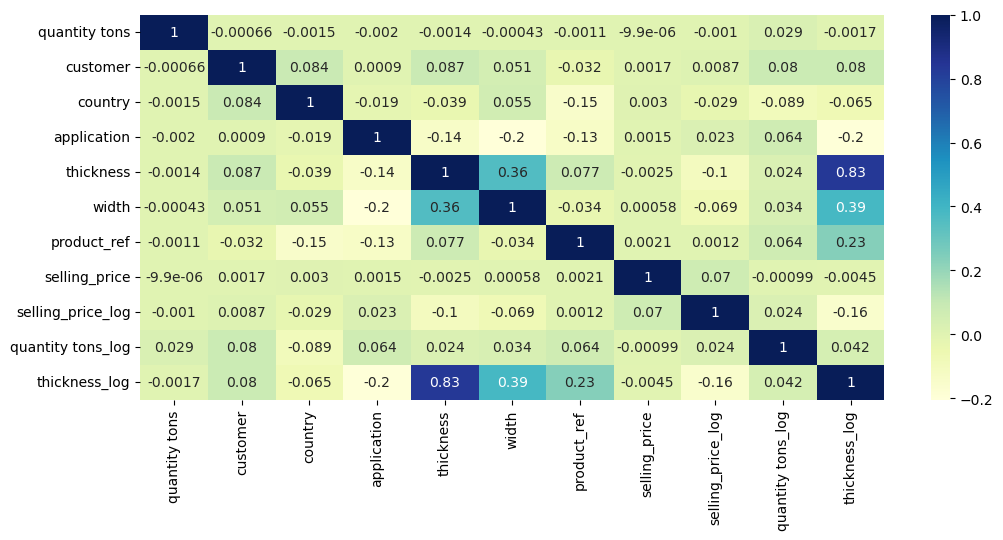

In [452]:
# checking correlation to remove any column using confusion matrix
int_col_name = []
for column in df_p.select_dtypes(include='number').columns:
    int_col_name.append(column)
x = df_p[int_col_name].corr()
plt.figure(figsize=(12, 5))
sns.heatmap(x, annot=True, cmap="YlGnBu")
plt.show()
# all numerical column are not corelated

# Encoding

In [453]:
# encoding categorical value for ML
df_p["status"].value_counts()

status
Won                115998
Lost                34431
Not lost for AM     19566
Revised              4276
To be approved       4169
Draft                3120
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [454]:
df_p["item type"].value_counts()

item type
W         105602
S          69201
PL          5659
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

In [455]:
df_p.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log,quantity tons_log,thickness_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,6.749931,3.991779,0.693147
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,6.953684,6.643822,-0.223144
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,6.468211,5.956169,-0.967584


In [456]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X=df_p[['quantity tons_log', 'customer', 'country', 'status', 'item type','application','thickness_log','width', 'product_ref']]
y=df_p['selling_price_log']

ohe_1 = OneHotEncoder(handle_unknown='ignore')
ohe_1.fit(X[['status']])
status = ohe_1.fit_transform(X[['status']]).toarray()

ohe_2 = OneHotEncoder(handle_unknown='ignore')
ohe_2.fit(X[['item type']])
item_type = ohe_2.fit_transform(X[['item type']]).toarray()


In [457]:
X = np.concatenate((X[['quantity tons_log', 'country', 'application','thickness_log','width', 'product_ref']].values, status, item_type), axis=1)


In [458]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
with open('r_scaler', 'wb') as file:
    pickle.dump(scaler, file)

# Regression

In [459]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
dtr = DecisionTreeRegressor()

In [461]:
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [ None, 'sqrt', 'log2']}

In [462]:
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [463]:
pd.DataFrame(grid_search.cv_results_)[["param_max_depth", "param_max_features", 
                                       "param_min_samples_leaf", "param_min_samples_split", 
                                       "mean_test_score", "rank_test_score"]].sort_values(by='rank_test_score', ascending=True).head(10)


,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,mean_test_score,rank_test_score
89,20,None,4,10,0.903381,1
87,20,None,4,2,0.902708,2
88,20,None,4,5,0.902707,3
86,20,None,2,10,0.899710,4
83,20,None,1,10,0.896747,5
62,10,None,4,10,0.896499,6
61,10,None,4,5,0.896476,7
60,10,None,4,2,0.896467,8
85,20,None,2,5,0.896326,9
84,20,None,2,2,0.895711,10


In [464]:
best_dtr = DecisionTreeRegressor(max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=10)
best_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)

In [465]:
best_dtr.score(X_test, y_test)

0.8984406738392612

In [466]:
from sklearn.metrics import mean_absolute_error
y_pred = best_dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('mean_absolute_error:', mae)
print('R-squared:', r2)

Mean squared error: 0.032287239266048325
mean_absolute_error: 0.1276832088363909
R-squared: 0.8984406738392612


In [467]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_dtr, X_train, y_train, cv=5)

In [468]:
scores

array([0.90555969, 0.90747482, 0.89614088, 0.91241486, 0.89517382])

In [469]:
scores.mean()

0.9033528161296654

In [470]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be

new_sample = np.array([[np.log(54.151139), 28.0, 10.0, np.log(2.00), 1500.0, 1670798778, "Won", "W"]])
new_sample_1 = ohe_1.transform(new_sample[:, [6]]).toarray()
new_sample_2 = ohe_2.transform(new_sample[:, [7]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5]], new_sample_1, new_sample_2), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_dtr.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [722.45530325]


C:\Users\usrva\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\usrva\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


# Classification

In [471]:
df_c = df_p[df_p["status"].isin(['Won', 'Lost'])]


In [472]:
df_c["status"].value_counts()

status
Won     115998
Lost     34431
Name: count, dtype: int64

In [473]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

y_c = df_c['status']
X_c = df_c[['quantity tons_log', 'country', 'item type','application','thickness_log','width', 'product_ref', 'selling_price_log']]

In [474]:
X_c.head()

,quantity tons_log,country,item type,application,thickness_log,width,product_ref,selling_price_log
0,3.991779,28.0,W,10.0,0.693147,1500.0,1670798778,6.749931
1,6.643822,25.0,W,41.0,-0.223144,1210.0,1668701718,6.953684
2,5.956169,30.0,WI,28.0,-0.967584,952.0,628377,6.468211
3,5.310301,32.0,S,59.0,0.832909,1317.0,1668701718,6.643790
4,6.666354,28.0,W,10.0,1.386294,2000.0,640665,6.357842


In [475]:
# encoding categorical variables
ohe_c = OneHotEncoder(handle_unknown='ignore')
item = ohe_c.fit_transform(X_c[['item type']]).toarray()
be = LabelBinarizer()
be.fit(y_c)   

y_c = be.fit_transform(y_c)

X_c = np.concatenate((X_c[['quantity tons_log', 'country', 'application','thickness_log','width', 'product_ref', 'selling_price_log']].values, item), axis=1)

In [476]:
# scalling
scaler = StandardScaler()
X_c = scaler.fit_transform(X_c)

In [477]:
pd.DataFrame(X_c).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.429116,-0.710186,-0.861372,0.202230,0.759524,1.667418,0.261203,-0.013398,-0.055564,-0.186034,-0.731730,-0.002578,0.797544,-0.057980
1,2.268677,-0.832694,0.895951,-0.781576,-0.330015,1.664494,1.106335,-0.013398,-0.055564,-0.186034,-0.731730,-0.002578,0.797544,-0.057980
2,1.791694,-0.628514,0.159009,-1.580869,-1.299329,-0.661129,-0.907323,-0.013398,-0.055564,-0.186034,-0.731730,-0.002578,-1.253850,17.247326
3,1.343694,-0.546842,1.916332,0.352290,0.071987,1.664494,-0.179053,-0.013398,-0.055564,-0.186034,1.366625,-0.002578,-1.253850,-0.057980
4,2.284306,-0.710186,-0.861372,0.946450,2.638039,-0.661111,-1.365113,-0.013398,-0.055564,-0.186034,-0.731730,-0.002578,0.797544,-0.057980


In [478]:
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size=0.2, random_state=2)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.8830352988100778
Confusion Matrix:
[[ 5114  1699]
 [ 1820 21453]]


In [479]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      6813
           1       0.93      0.92      0.92     23273

    accuracy                           0.88     30086
   macro avg       0.83      0.84      0.83     30086
weighted avg       0.88      0.88      0.88     30086



In [480]:
scores = cross_val_score(dtc, X_train, y_train, cv=5)
scores

array([0.87710333, 0.87294861, 0.87236695, 0.87427289, 0.87672428])

In [481]:
scores.mean()

0.8746832107455621

In [482]:
# Saving both model using pickling
import pickle
with open('rmodel', 'wb') as file:
    pickle.dump(best_dtr, file)
with open('cmodel', 'wb') as file:
    pickle.dump(dtc, file)

In [483]:
# also Saving HotOneEncoding Object using pickling
with open('r_ohe_1', 'wb') as file:
    pickle.dump(ohe_1, file)
with open('r_ohe_2', 'wb') as file:
    pickle.dump(ohe_2, file) 
with open('c_ohe', 'wb') as file:
    pickle.dump(ohe_c, file) 
with open('c_scaler', 'wb') as file:
    pickle.dump(scaler, file)